In [3]:
from core import initialize_bodies
from core import calculate_force
from core import Body
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colormaps

In [8]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
#bodies = initialize_bodies(3, mass_range = [10, 100], position_range = [-50, 50], velocity_range = [-0.5, 0.5])


bodies = [
    Body(mass=100, position=[0, 0], velocity=[0, 0]),
    Body(mass=1, position=[70, 0], velocity=[0,1]),
    Body(mass=1, position=[35, 0], velocity=[0,1.5])
]

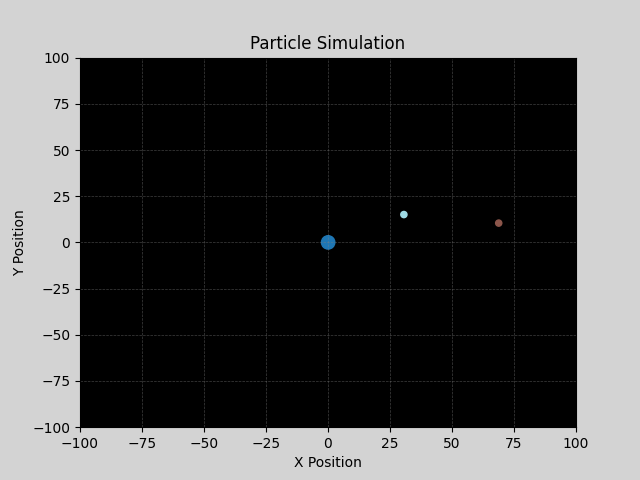

In [9]:
# Animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-100, 100) # X-axis limits
ax.set_ylim(-100, 100) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

cmap = colormaps["tab20"].resampled(len(bodies))  # Dynamically resample colormap
colors = [cmap(i) for i in range(len(bodies))] # Create list of colors

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s = [20*(body.mass)**(1/3) for body in bodies], # Size of bodies proportional to mass
    c=colors,  # Color of bodies
)

# Update function for animation
def update_position(frame):

    for n, body in enumerate(bodies):

        F = calculate_force(bodies) # calculate net force on bodies

        # Leapfrog method
        body.velocity += 0.5 * F[n] / body.mass * dt # Update velocity (half step)
        body.position += body.velocity * dt # Update position (full step)
        F = calculate_force(bodies) # Recalculate force
        body.velocity += 0.5 * F[n] / body.mass * dt # Update velocity (second half step)
        positions = [body.position for body in bodies] # Create array of positions to update scatter plot
    scat.set_offsets(positions)  # Update scatter plot
  
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(10000),  # Number of frames
    interval=1,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

#ani.save('particle_simulation.mp4', writer='ffmpeg', fps=30) # Save animation as .mp4

# Show the plot
plt.show()

In [6]:
F = calculate_force(bodies)

for i, body in enumerate(bodies):
    print(f'Net foce on body_{i} Fx = {F[i,0]} Fy = {F[i,1]})')

Net foce on body_0 Fx = 0.2086324566862959 Fy = 0.889751828667646)
Net foce on body_1 Fx = -0.2086324566862959 Fy = -0.889751828667646)
